#### Diabetes Predict 

## Import libraries and Dataset

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install warnings
%pip install scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler # used to standardize features by removing the mean and scaling to unit variance
from xgboost import XGBClassifier # an implementation of gradient boosted decision trees designed for speed and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


### Read Data

In [3]:
diabetes= pd.read_csv('D:/study/DS/diabetes_dataset.csv')
print('Data read successfully!')

Data read successfully!


In [4]:
# Display the first 10 rows of the dataset
diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## Descriptive Statistics

In [5]:
diabetes.shape

(100000, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Statistical summary of the dataset
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
# count of missing values in each column
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Count the number of zero values in each column
(diabetes == 0).sum()

gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes               91500
dtype: int64

#### Check duplicate

In [10]:
# Check for duplicate values
print(f"Total duplicates: {diabetes.duplicated().sum()}")

df = diabetes.copy()
#remove duplicate values
df = df.drop_duplicates()
print (f"__Removed Duplicates__" +'\n' + f"Total Duplicates: {df.duplicated().sum()}")

Total duplicates: 3854
__Removed Duplicates__
Total Duplicates: 0


In [11]:
df.columns = df.columns.str.title() # Capitalize column names
print(df.columns)


Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'Bmi', 'Hba1C_Level', 'Blood_Glucose_Level', 'Diabetes'],
      dtype='object')


In [12]:
for col in df.columns:
    print(f"- {col}: {df[col].unique()}")

- Gender: ['Female' 'Male' 'Other']
- Age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
- Hypertension: [0 1]
- Heart_Disease: [1 0]
- Smoking_History: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
- Bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
- Hba1C_Level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
- Blood_Glucose_Level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220

### Counts Plots

- Minimum age: 0.08
- Maximum age: 80.0
- Average : 41.79432571297817
- Diabetes Counts:
Diabetes
0    87664
1     8482
Name: count, dtype: int64
- Age Statistics by Diabetes Status:
           min   max
Diabetes            
0         0.08  80.0
1         3.00  80.0


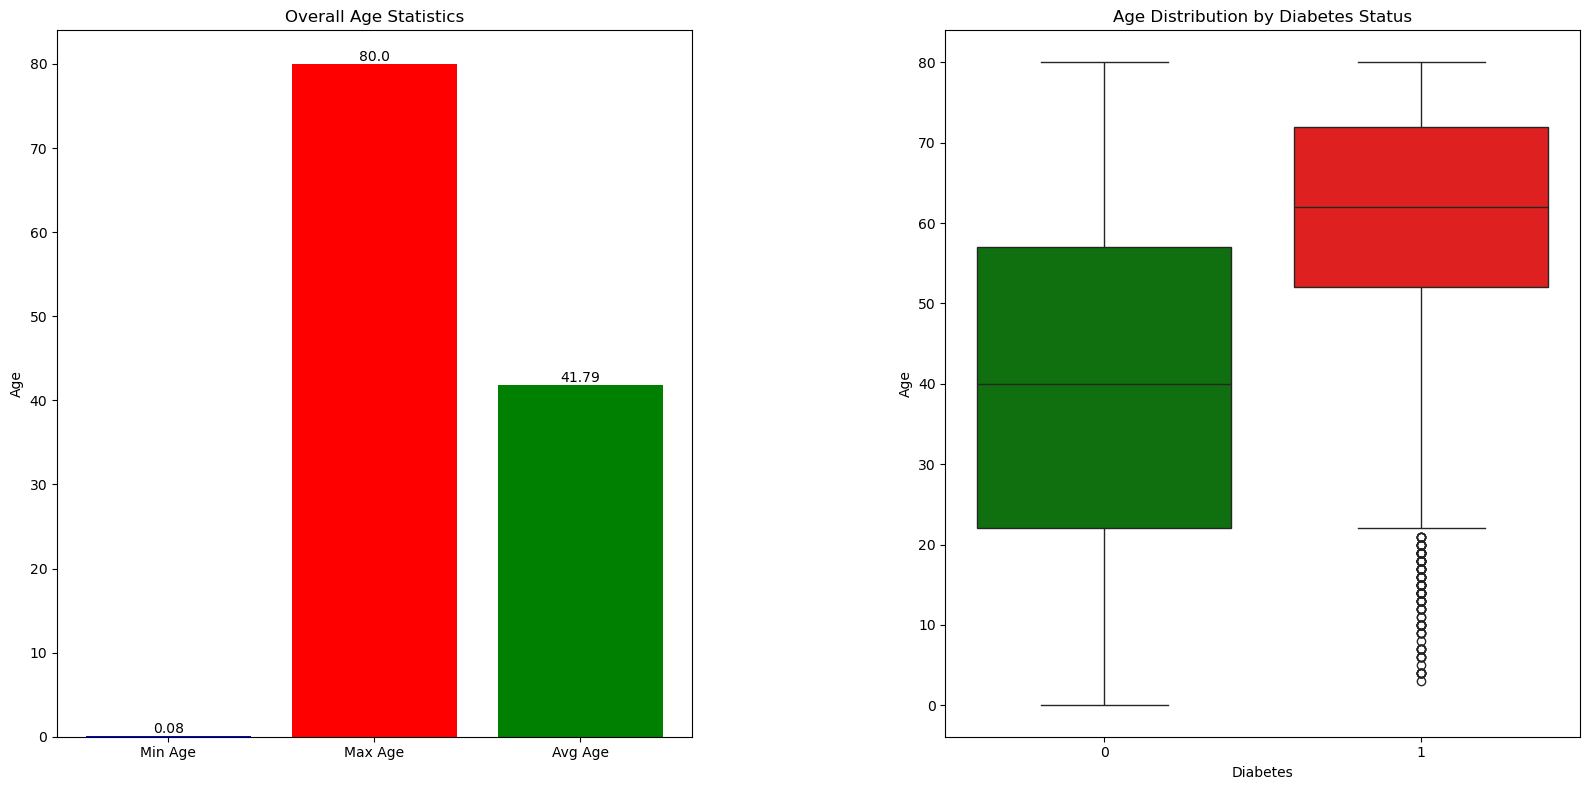

In [13]:
# Calculate minimum, maximum, and average age
min_age = df['Age'].min()
max_age = df['Age'].max()
avg_age = df['Age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['Diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('Diabetes')['Age'].agg(['min', 'max'])

# Print the results
print(f"- Minimum age: {min_age}")
print(f"- Maximum age: {max_age}")
print(f"- Average : {avg_age}")
print("- Diabetes Counts:")
print(diabetes_counts)
print("- Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plot for overall min, max, and average age

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Box plot for age distribution by diabetes
sns.boxplot(
    ax=ax[1],
    x='Diabetes',
    y='Age',
    data=df,
    palette={'0': 'green', '1': 'red'}
)
ax[1].set_title('Age Distribution by Diabetes Status')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Age')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()


- **The minimum age of a person with diabetes is 3 years old.**
- **The maximum age of a person with diabetes is 80 years old.**
- **The average age in the dataset is 69 years old.**
- **Diabetes is concentrated in people over 50 years old**

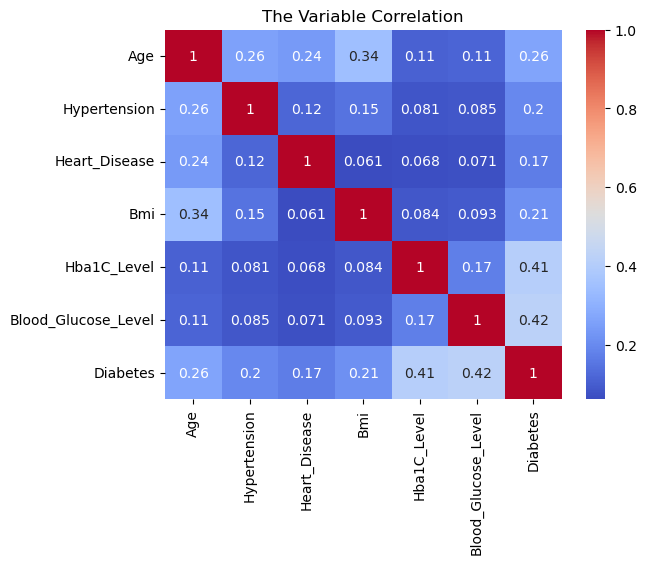

In [14]:
# The Variable correlation heatmap (numeric columns only)
#df['Diabetes'] = df['Diabetes'].astype(int)

# Select only numeric columns for correlation
numeric_cols = [ 'Age', 'Hypertension', 'Heart_Disease', 'Bmi', 'Hba1C_Level', 'Blood_Glucose_Level', 'Diabetes']
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('The Variable Correlation')
plt.show()

###  Encode Data

In [15]:
# Doing One-Hot Encoding of Gender and Smoking_History columns

df_encoded = pd.get_dummies(df[['Gender', 'Smoking_History']], drop_first=True)
df_encoded.head()


,Gender_Male,Gender_Other,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False
3,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False


In [16]:
# Concatenate the original dataframe with the encoded columns
x = pd.concat([df, df_encoded], axis=1)
x.head(10)

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Gender_Male,Gender_Other,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False,False,False,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False,False,False,False,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,True,False,False,False,False,True,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,False,True,False,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,False,True,False,False,False,False
5,Female,20.0,0,0,never,27.32,6.6,85,0,False,False,False,False,False,True,False
6,Female,44.0,0,0,never,19.31,6.5,200,1,False,False,False,False,False,True,False
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,False,False,False,False,False,False,False
8,Male,42.0,0,0,never,33.64,4.8,145,0,True,False,False,False,False,True,False
9,Female,32.0,0,0,never,27.32,5.0,100,0,False,False,False,False,False,True,False


In [17]:
# Converting datatype of hypertension and heart_disease columns to category
df.Age = df.Age.astype(int)
df.Hypertension = df.Hypertension.astype('category')
df.Heart_Disease = df.Heart_Disease.astype('category')
df.Diabetes = df.Diabetes.astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               96146 non-null  object  
 1   Age                  96146 non-null  int32   
 2   Hypertension         96146 non-null  category
 3   Heart_Disease        96146 non-null  category
 4   Smoking_History      96146 non-null  object  
 5   Bmi                  96146 non-null  float64 
 6   Hba1C_Level          96146 non-null  float64 
 7   Blood_Glucose_Level  96146 non-null  int64   
 8   Diabetes             96146 non-null  category
dtypes: category(3), float64(2), int32(1), int64(1), object(2)
memory usage: 5.0+ MB


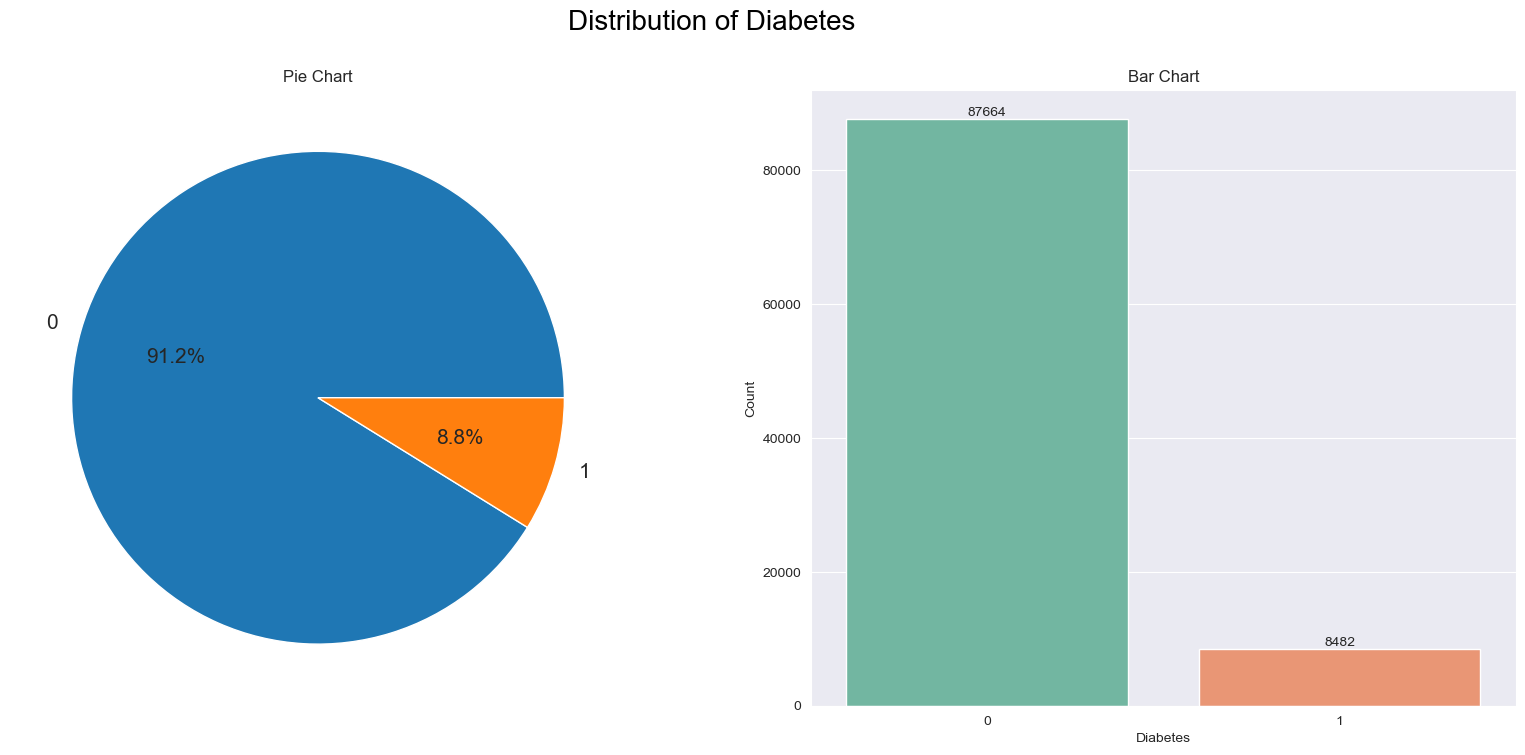

In [19]:
# Creating a figure with 2 subplots to visualize the distribution of Diabetes

plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.suptitle('Distribution of Diabetes ', color = 'black', fontsize=20)

#subplot 1: Pie Chart
plt.subplot(1, 2, 1)
diabetes_counts = df['Diabetes'].value_counts()
diabetes_counts.plot(kind='pie', fontsize=15, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Diabetes', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Bar Chart')

plt.show()



In [20]:
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

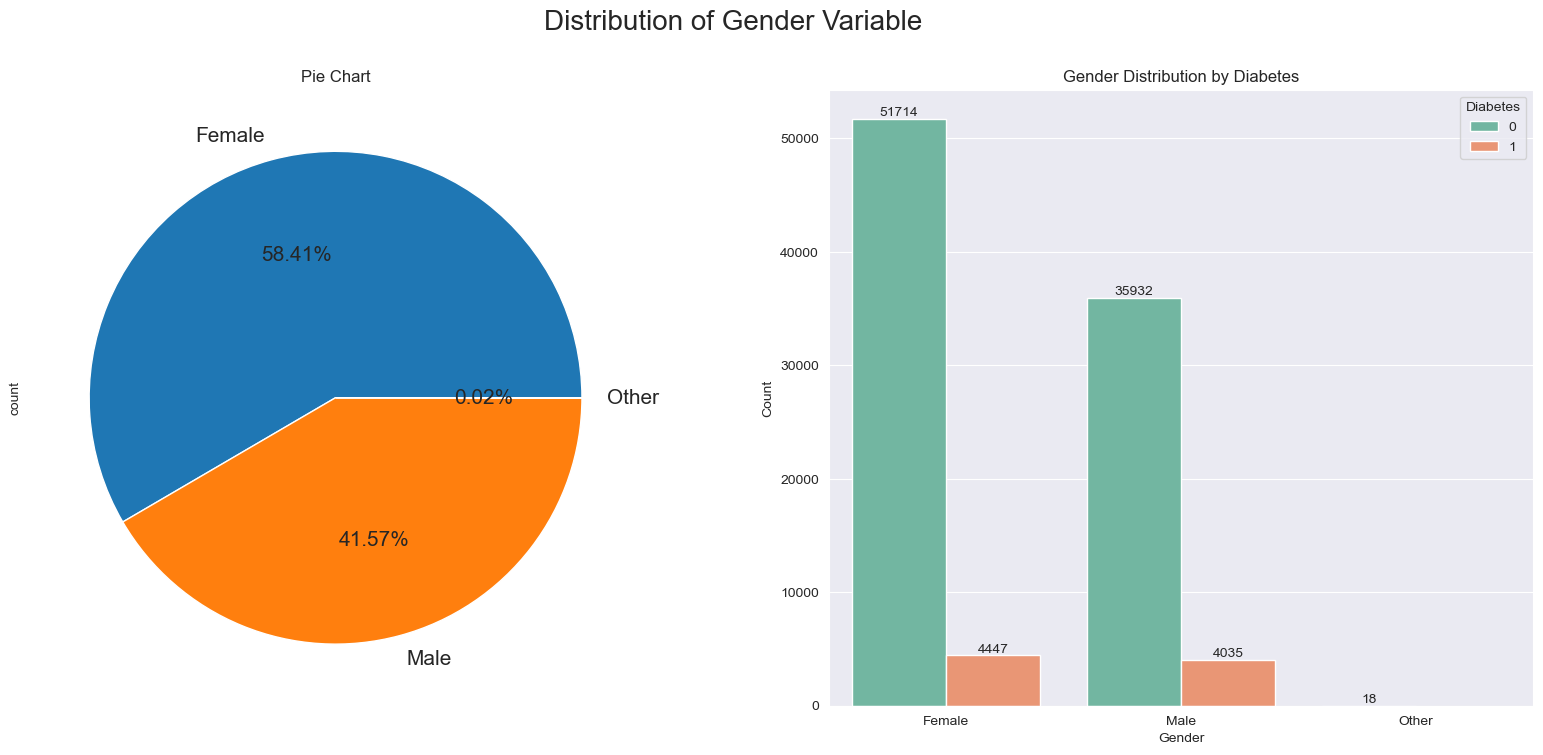

In [21]:
# 2 subplots to visualize the distribution of Gender and its distribution by Diabetes
plt.figure(figsize=(20,8))
plt.suptitle('Distribution of Gender Variable', fontsize=20)

# Subplot 1: Pie Chart
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='pie', fontsize=15, autopct='%1.2f%%')
plt.title('Pie Chart')

# Subplot 2: Bar chart grouped by Diabetes
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Gender', hue='Diabetes', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution by Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()


In [22]:
def distributionChart(df, features, group_col='Diabetes'):
    """
    Plot distribution and boxplot of features grouped by a category (default: Diabetes).

    Parameters:
        df (pd.DataFrame): Dataset
        features (list): List of numeric columns to visualize
        group_col (str): The column to group by (e.g., 'Diabetes')
    """
    for col in features:
        plt.figure(figsize=(18, 6))
        sns.set_style('darkgrid')
        plt.suptitle(f'Distribution of {col} by {group_col}', fontsize=20)

        # -----------------------
        # Subplot 1: Histogram + KDE by group
        # -----------------------
        plt.subplot(1, 2, 1)
        for group_value in sorted(df[group_col].unique()):
            subset = df[df[group_col] == group_value]
            sns.kdeplot(subset[col], label=f'{group_col} = {group_value}', fill=True, alpha=0.4)

        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'KDE Distribution of {col} by {group_col}')
        plt.legend()

        # -----------------------
        # Subplot 2: Boxplot by group
        # -----------------------
        plt.subplot(1, 2, 2)
        sns.boxplot(x=group_col, y=col, data=df, palette='Set2')
        plt.xlabel(group_col)
        plt.ylabel(col)
        plt.title(f'Boxplot of {col} by {group_col}')

        # Layout & show
        plt.tight_layout()
        plt.show()


In [23]:
num = df.select_dtypes('number').columns
num

Index(['Age', 'Bmi', 'Hba1C_Level', 'Blood_Glucose_Level'], dtype='object')

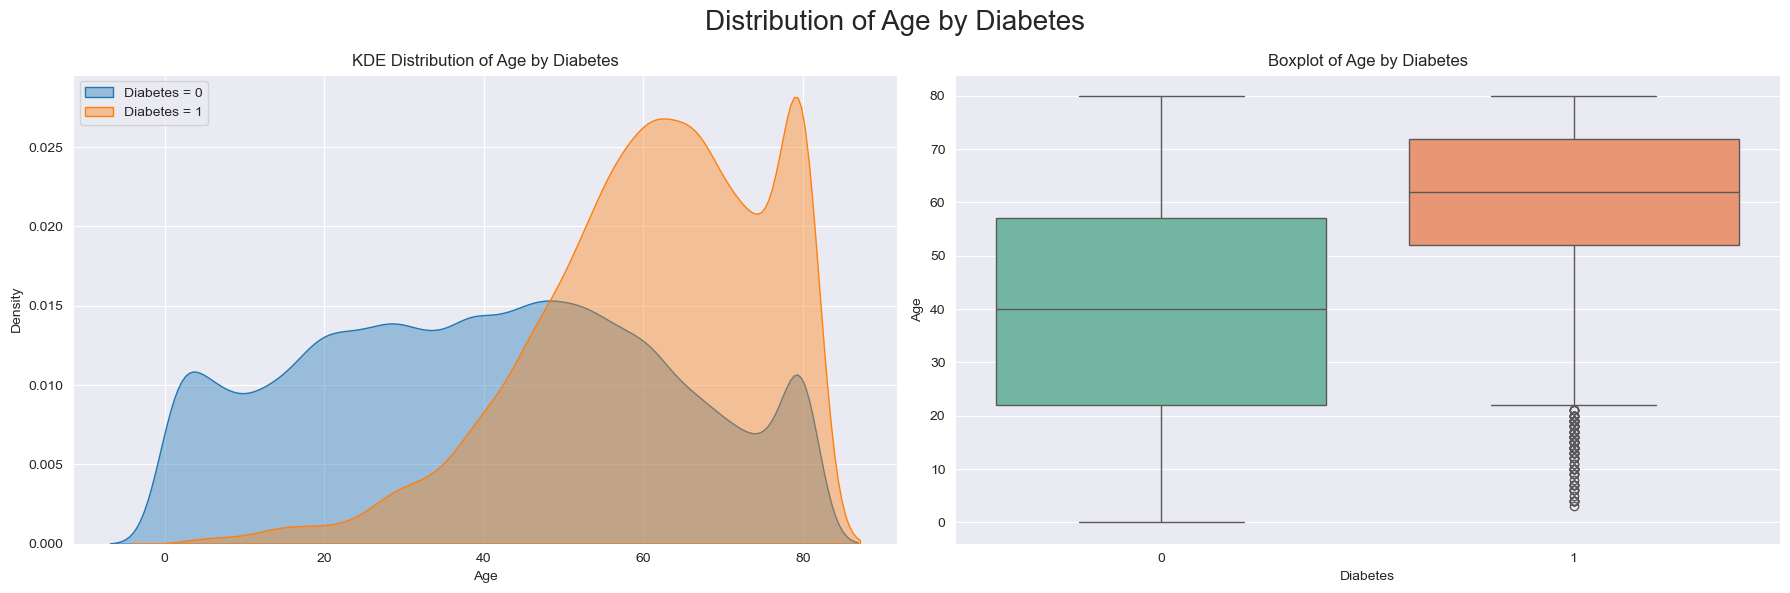

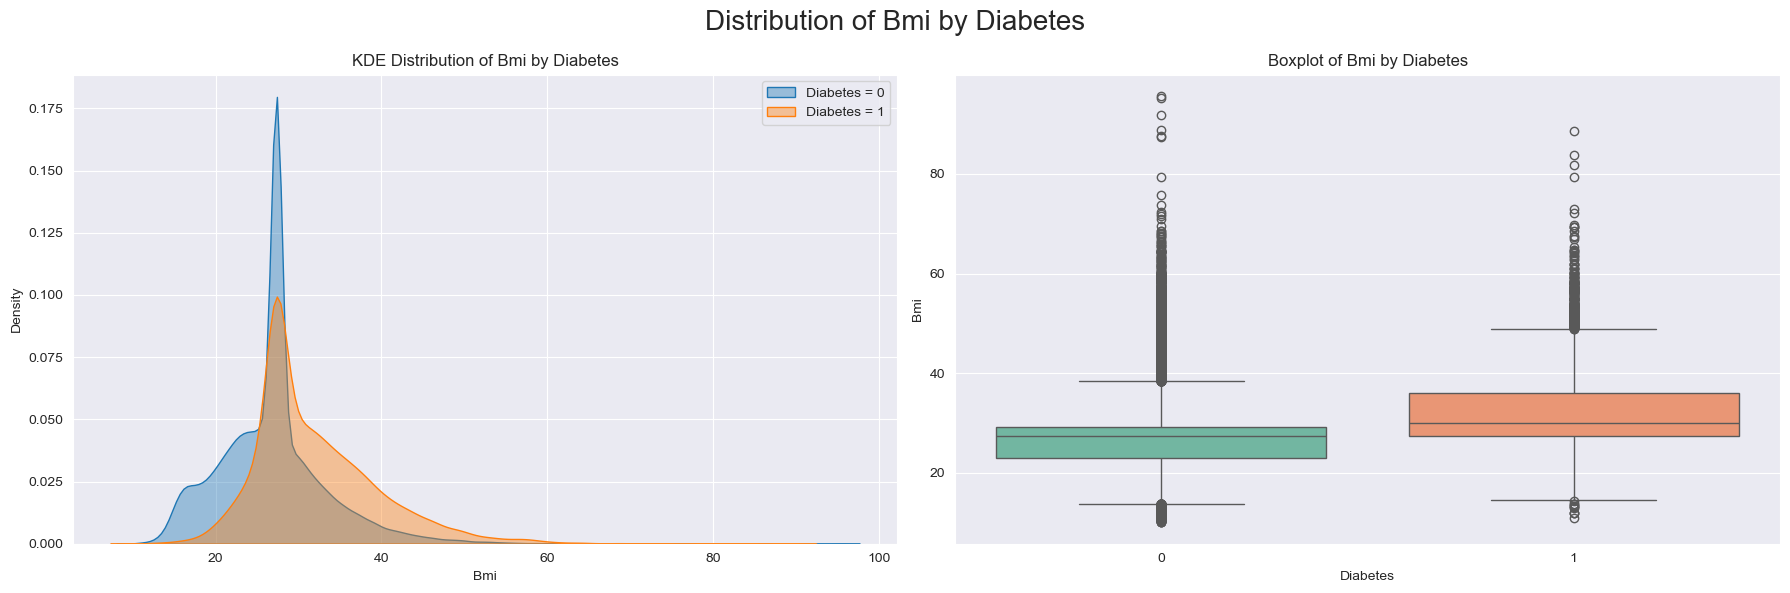

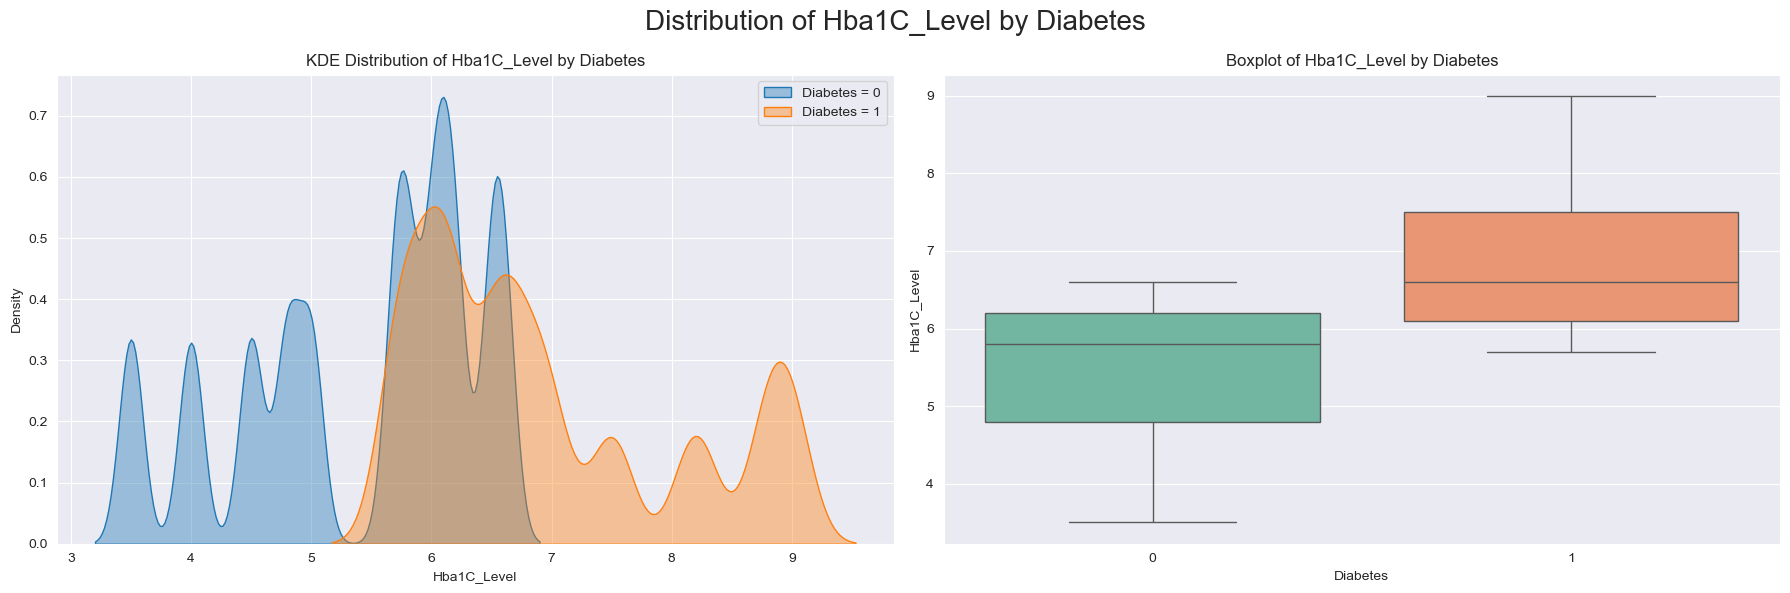

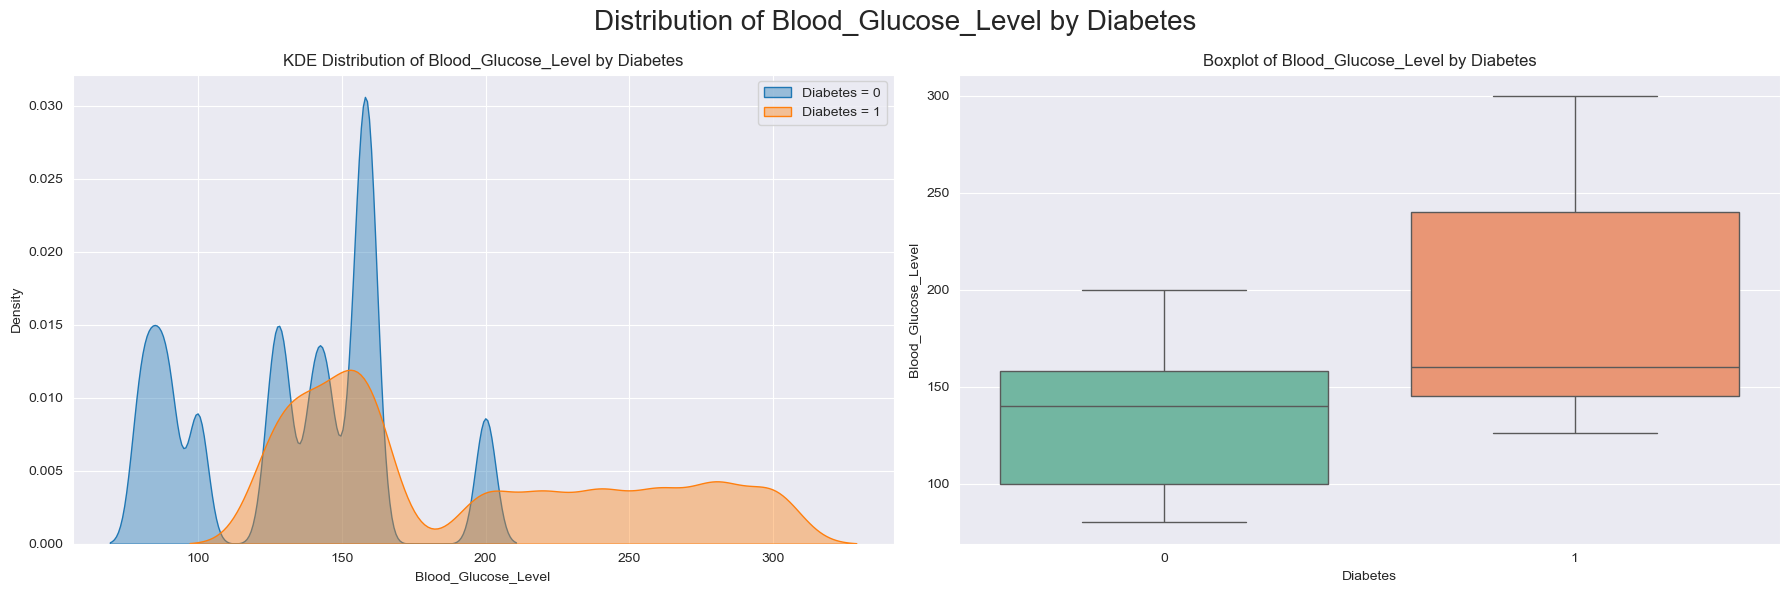

In [24]:
# Using the function to plot the distribution of numeric features
distributionChart(df,num, group_col='Diabetes')

In [25]:
print('---------Mean-------------')
for col in num:
	print(f"{col}: {df[col].mean()}")
print()

print('---------Median-------------')
for col in num:
	print(f"{col}: {df[col].median()}")
print()


---------Mean-------------
Age: 41.78375595448588
Bmi: 27.32146111122668
Hba1C_Level: 5.532608740873255
Blood_Glucose_Level: 138.21823060761758

---------Median-------------
Age: 43.0
Bmi: 27.32
Hba1C_Level: 5.8
Blood_Glucose_Level: 140.0



### Principal Component Analysis (PCA)

In [26]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.select_dtypes(include=[np.number]))
x_scaled[0]

array([ 1.7008397 , -0.29005038,  4.84853426, -0.31494707,  0.99456295,
        0.04355386, -0.31105594])

In [27]:
# Define feature set and target variable
feature = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'Bmi', 'Hba1C_Level', 'Blood_Glucose_Level']
x = df[feature]
y = df['Diabetes']

In [28]:
# Value Counts of y and check if one individual has diabetes or not
# 0: No Diabetes, 1: Has Diabetes
y.value_counts()

Diabetes
0    87664
1     8482
Name: count, dtype: int64

In [29]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

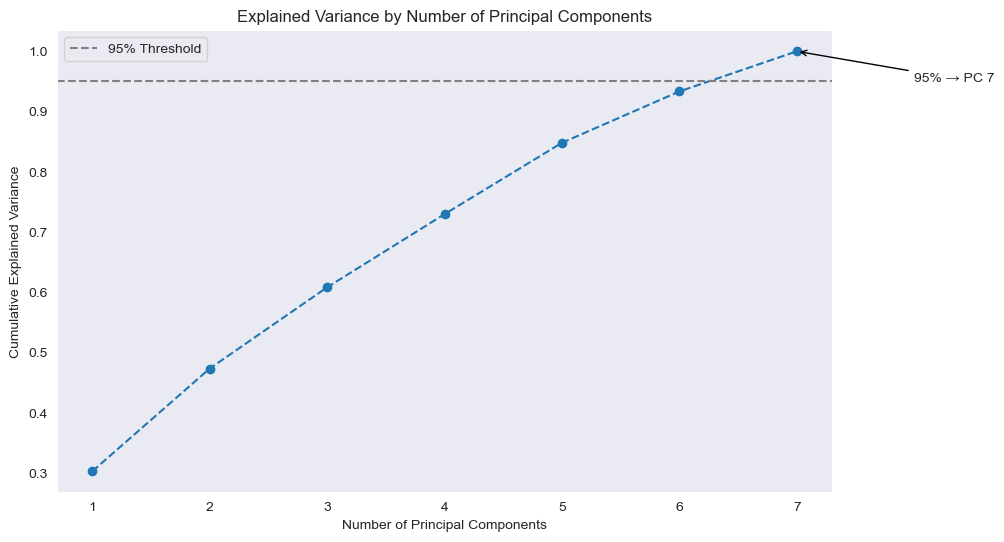

Principal Component 1: 0.3036 cumulative explained variance
Principal Component 2: 0.4740 cumulative explained variance
Principal Component 3: 0.6087 cumulative explained variance
Principal Component 4: 0.7300 cumulative explained variance
Principal Component 5: 0.8484 cumulative explained variance
Principal Component 6: 0.9335 cumulative explained variance
Principal Component 7: 1.0000 cumulative explained variance


In [30]:
# Compute the cumulative explained variance
cum_var = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(
    range(1, len(cum_var) + 1),
    cum_var,
    marker='o',
    linestyle='--'
)
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Define the threshold for explained variance (e.g., 95%)
threshold = 0.95

# Find the number of components needed to reach the threshold
n_components = (cum_var >= threshold).argmax() + 1  # +1 because Python index starts at 0

# Annotate the chosen point on the plot with a black arrow
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'{int(threshold*100)}% Threshold')
plt.annotate(
    f'{threshold*100:.0f}% → PC {n_components}',
    xy=(n_components, cum_var[n_components - 1]),
    xytext=(n_components + 1, cum_var[n_components - 1] - 0.05),
    arrowprops=dict(color='black', arrowstyle='->'),
    fontsize=10
)
plt.legend()
plt.show()

# Print cumulative explained variance for each principal component
for i, ratio in enumerate(cum_var):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Apply PCA again using the optimal number of components
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)


**=> The best compoment is 7**

In [31]:
# save data after clean
df.to_csv('D:/study/DS/diabetes_dataset_cleaned.csv', index=False)
print("Data saved successfully!")

Data saved successfully!


## **BUILD MODEL**

### **1. XGBoots**

### **1. XGBoots**

In [32]:
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2 , random_state=42)

# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy= round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'XGBBoot Accuracy: {accuracy}%')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')


print('Trainning Score: ', str(round(rfc.score(x_train, y_train)*100, 1)) + '%')
print('Testing Score: ', str(round(rfc.score(x_test, y_test)*100, 1)) + '%')
print('Mean Squared Error: ', str(round(mean_squared_error(y_test, y_pred)*100,2))+ '%')
print('R2 Score: ', str(round(r2_score(y_test, y_pred)*100,2))+ '%')


XGBBoot Accuracy: 99.99%
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230



NameError: name 'rfc' is not defined

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score


rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

# Evaluate the Random Forest model
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc) * 100, 2)


print(f'Random Forest Accuracy: {accuracy_rfc:.2f}%')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rfc)}')
print(f'Random Classification Report:\n{classification_report(y_test, y_pred_rfc)}')
print('Trainning Score: ', str(round(rfc.score(x_train, y_train)*100, 1)) + '%')
print('Testing Score: ', str(round(rfc.score(x_test, y_test)*100, 1)) + '%')
print('Mean Squared Error: ', str(round(mean_squared_error(y_test, y_pred_rfc)*100,2))+ '%')
print('R2 Score: ', str(round(r2_score(y_test, y_pred_rfc)*100,2))+ '%')


Random Forest Accuracy: 100.00%
Random Forest Confusion Matrix:
[[17509     0]
 [    0  1721]]
Random Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230

Trainning Score:  100.0%
Testing Score:  100.0%
Mean Squared Error:  0.0%
R2 Score:  100.0%


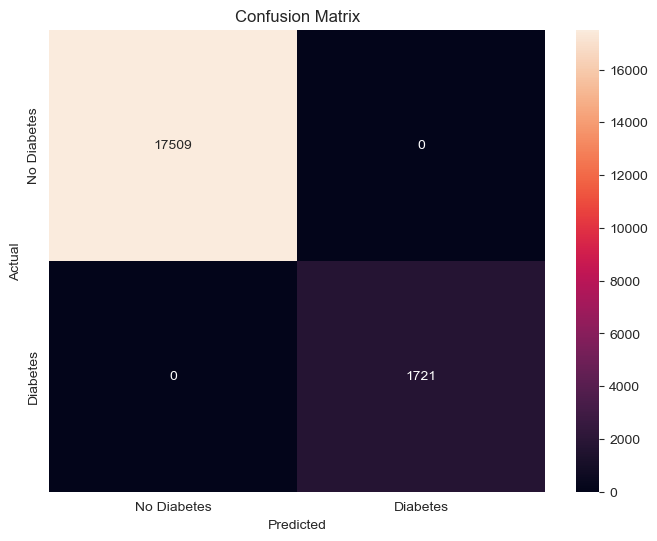

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle
# Save the model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
    